## ImageNet Subset CNN Image Classification

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [25]:
# Load class ID to name mapping from desc.txt
imagenette_map = {}

with open(r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\desc.txt", "r") as file:
    for line in file:
        if ":" in line:
            key, value = line.strip().replace('"', '').replace(',', '').split(":")
            imagenette_map[key.strip()] = value.strip()

print(imagenette_map)


{'n01440764': 'tench', 'n02102040': 'springer', 'n02979186': 'casette_player', 'n03000684': 'chain_saw', 'n03028079': 'church', 'n03394916': 'French_horn', 'n03417042': 'garbage_truck', 'n03425413': 'gas_pump', 'n03445777': 'golf_ball', 'n03888257': 'parachute'}


In [31]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 10

train_dir = r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\train"
val_dir = r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\val"

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Mapping from index to class ID
index_to_class_id = {v: k for k, v in train_data.class_indices.items()}




Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


Found 3925 images belonging to 10 classes.


In [34]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [35]:
history = model.fit(train_data, validation_data=val_data, epochs=5)




Epoch 1/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.2297 - loss: 2.1520 - val_accuracy: 0.4064 - val_loss: 1.8090
Epoch 2/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 666s 2s/step - accuracy: 0.3773 - loss: 1.8078 - val_accuracy: 0.3546 - val_loss: 1.8114
Epoch 3/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 649s 2s/step - accuracy: 0.4202 - loss: 1.6853 - val_accuracy: 0.4810 - val_loss: 1.5923
Epoch 4/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.4465 - loss: 1.6039 - val_accuracy: 0.4604 - val_loss: 1.5679
Epoch 5/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 594s 2s/step - accuracy: 0.4633 - loss: 1.5584 - val_accuracy: 0.4861 - val_loss: 1.5356


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


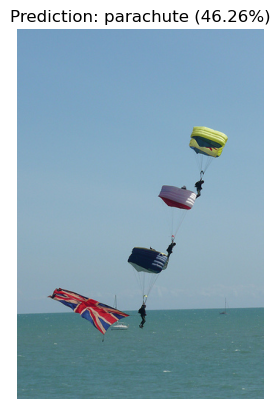

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


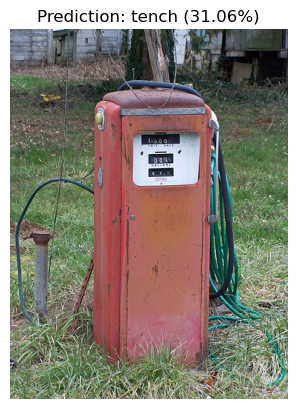

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


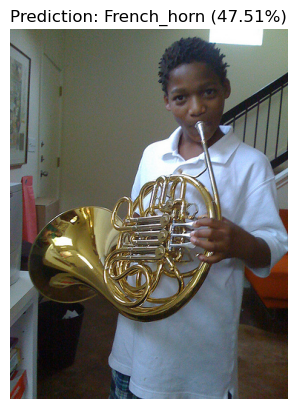

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


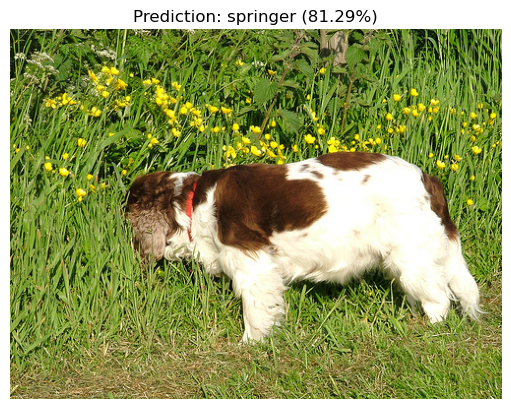

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


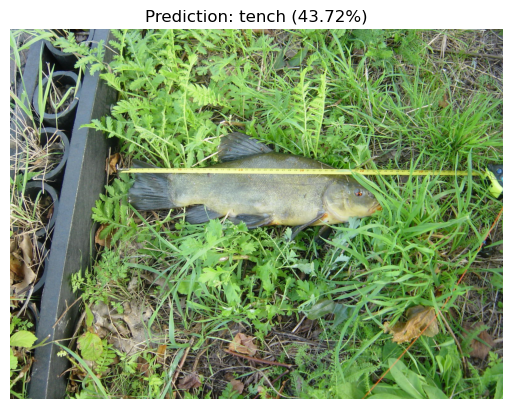

 86/123 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict and display label for a single image
def predict_with_label(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    pred_idx = np.argmax(prediction)
    class_id = index_to_class_id[pred_idx]
    label = imagenette_map[class_id]

    # Display image and prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Prediction: {label} ({prediction[pred_idx]*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Wrapper to predict multiple images
def predict_multiple_images(*img_paths):
    for path in img_paths:
        predict_with_label(path)

# Evaluate on the entire validation set
def evaluate_model_on_val_data(val_data):
    val_data.reset()
    y_pred = model.predict(val_data)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = val_data.classes

    # Generate class names
    class_indices = val_data.class_indices
    class_labels = [imagenette_map[class_id] for class_id in class_indices.keys()]

    # Classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Example usage
predict_multiple_images(
    r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\val\n03888257\n03888257_1222.JPEG",
    r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\val\n03425413\n03425413_11592.JPEG",
    r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\val\n03394916\n03394916_26940.JPEG",
    r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\val\n02102040\n02102040_671.JPEG",
    r"C:\Users\azwin\OneDrive\Desktop\imagenet subset\val\n01440764\n01440764_5902.JPEG"
)

evaluate_model_on_val_data(val_data)

